In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [101]:
import numpy as np
from scipy import misc
from skimage import feature, filters
from scipy import ndimage
from PIL import Image
from scipy import misc
import matplotlib.pyplot as plt

In [97]:
#def hough_line(img, angle_step=1):
#img = misc.imread('binary_crosses.png')
img = array(Image.open('cartoon.jpg'))
angle_step=1
#plt.imshow(img)

In [118]:
img = np.array(Image.open('egg.jpg'))
#plt.imshow(img)
print img.shape
r=7

(185, 174, 3)


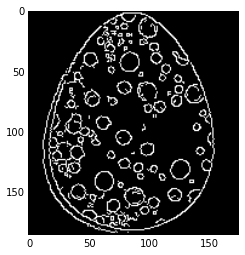

In [119]:
import cv2

edges = cv2.Canny(img,100,200)
plt.imshow(edges,cmap='gray')
accumulator1 = np.zeros(edges.shape)
for (i,j),value in np.ndenumerate(edges):
    if value:
        for t_idx in arange(0,2*math.pi,math.pi/100):
            a = int(i - (r * math.cos(t_idx)));
            b = int(j + (r * math.sin(t_idx)));
            if a>0 and b>0 and a < accumulator1.shape[0] and b < accumulator1.shape[1]:
                accumulator1[a, b] += 1
        

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


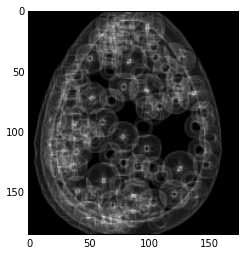

In [120]:
print accumulator1
plt.imshow(accumulator1,cmap='gray')

(185, 174, 3)


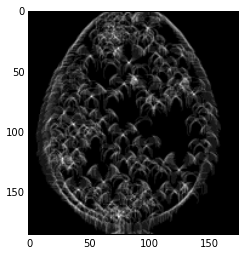

In [143]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.2989,0.5870,0.1140])

img = np.array(Image.open('egg.jpg'))
#plt.imshow(img)
grayimg = rgb2gray(img)
print img.shape
r=7

edges = cv2.Canny(img,100,200)
dx = ndimage.sobel(grayimg, axis=0, mode='constant')
dy = ndimage.sobel(grayimg, axis=1, mode='constant')
accumulator = np.zeros(edges.shape)
for (i,j),value in np.ndenumerate(edges):
    if value:
        gradient = math.atan(-dx[i,j]/(dy[i,j]+0.00001))
        for theta in arange(gradient-math.pi/4,gradient+math.pi/4,math.pi/100):
            a = int(i - (r * math.cos(theta)));
            b = int(j + (r * math.sin(theta)));
            if a < accumulator.shape[0] and b < accumulator.shape[1]:
                accumulator[a, b] += 1
plt.imshow(accumulator,cmap='gray')

In [95]:
print accumulator

[[ 0.  0.  1. ...,  2.  0.  1.]
 [ 0.  0.  1. ...,  1.  0.  1.]
 [ 0.  0.  2. ...,  2.  0.  0.]
 ..., 
 [ 0.  0.  3. ...,  1.  1.  0.]
 [ 0.  1.  2. ...,  1.  1.  1.]
 [ 0.  1.  2. ...,  0.  0.  1.]]


5.0
[[ 0.   0.   0.2 ...,  0.4  0.   0.2]
 [ 0.   0.   0.2 ...,  0.2  0.   0.2]
 [ 0.   0.   0.4 ...,  0.4  0.   0. ]
 ..., 
 [ 0.   0.   0.6 ...,  0.2  0.2  0. ]
 [ 0.   0.2  0.4 ...,  0.2  0.2  0.2]
 [ 0.   0.2  0.4 ...,  0.   0.   0.2]]
[  1   6   7  11  12  13  15  18  18  26  31  32  32  42  42  48  50  51
  57  58  58  61  65  66  67  68  70  71  80  82  85  88  89  94  94  96
  96 102 107 108 109 109 119 120 120 122 123 123 124 126 127 127 128 129
 130 131 131 132 133 138 140 141 142 144 149 149 154 156 157 158 158 158
 159 162 162 162 163 166 166 168 170 172 172 172 175 176 181 182]
88
88
[[ 103.    1.]
 [ 112.    6.]
 [ 159.    7.]
 [  65.   11.]
 [ 101.   12.]
 [  84.   13.]
 [  68.   15.]
 [  64.   18.]
 [  82.   18.]
 [  62.   26.]
 [  81.   31.]
 [  73.   32.]
 [  94.   32.]
 [  57.   42.]
 [ 116.   42.]
 [  84.   48.]
 [  82.   50.]
 [ 125.   51.]
 [  35.   57.]
 [  45.   58.]
 [  72.   58.]
 [ 122.   61.]
 [  80.   65.]
 [  44.   66.]
 [  52.   67.]
 [  49.   68.]
 [ 107

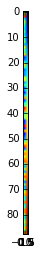

In [96]:
print np.amax(accumulator)
accumulator = accumulator/accumulator.max();
print accumulator
i,j = np.where(accumulator > 0.7);
print i
print len(i)
print len(j)

centers = np.zeros((len(j),2));

centers[:,0]=j;
centers[:,1]=i;
print centers
plt.imshow(centers);

In [89]:
# Draw the most prominent 5 circles
#img = color.gray2rgb(img)
for idx in np.argsort(accumulator)[::-1][:]:
    center_x, center_y = centers[idx]
    #radius = radii[idx]
    cx, cy = circle_perimeter(center_y, center_x, r)
    img[cy, cx] = (220, 20, 20)

plt.imshow(img)

IndexError: index 255 is out of bounds for axis 0 with size 77

In [ ]:




if 1:
    img = misc.imread('binary_crosses.png')

    img = np.array(Image.open('binary_crosses.png').convert('L'))
    #img = filter.canny(img)
    #  img = 1 * (img > 50)
    #  print img.shape
    accumulator, thetas, rhos = hough_line(img)
    show_hough_line(img, accumulator)

In [ ]:
def show_hough_line(img, accumulator):
    import matplotlib.pyplot as plt
    print "entered show function"
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    #plt.axis('off')
    plt.savefig('output.png', bbox_inches='tight')
    plt.show()